# Тестирование регрессионных моделей

In [1]:
import sys
import os
current_dir = os.path.abspath('')
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, project_root)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import time
from utils.metrics import cross_validation, create_model

## Предобработка данных

In [3]:
data=pd.read_csv('../data/Student_Performance.csv', sep=',') #Загрузка данных

In [4]:
ohe=OneHotEncoder(sparse_output=False,drop='first')#Кодировка категориального признака
d=ohe.fit_transform(data[['Extracurricular Activities']])

In [5]:
X=np.concatenate((data[['Hours Studied', 'Previous Scores', 'Sleep Hours','Sample Question Papers Practiced']],d),axis=1)#Формирование матрицы признаков
Y=data['Performance Index'].to_numpy().reshape(-1)#Формирование вектора таргетов

In [6]:
X_train, X_2, y_train, y_2 = train_test_split(X, Y, test_size=0.3, random_state=43)#Формирование тренировочной выборки
X_test, X_val, y_test, y_val = train_test_split(X_2, y_2, test_size=0.33, random_state=43)#Формирование тестовой и валидационной выборки

## Тестирование алгоритма гребневой регрессии

In [7]:
from RidgeRegression import RidgeRegressor
from sklearn.linear_model import Ridge 

In [8]:
ridge=RidgeRegressor(fit_intercept=True)
ridge_etalon=Ridge(alpha=0)

In [9]:
start = time.time()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
end = time.time()
print("Время обучения и предсказания собственной реализации гребневой регрессии:",
      round((end-start) * 10**3,3), "ms")

start = time.time()
ridge_etalon.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
end = time.time()
print("Время обучения и предсказания эталонной реализации гребневой регрессии:",
      round((end-start) * 10**3,3), "ms")


Время обучения и предсказания собственной реализации гребневой регрессии: 1.149 ms
Время обучения и предсказания эталонной реализации гребневой регрессии: 1.143 ms


In [12]:
ridge.cond_number()#Обусловленное число матрицы

np.float64(449.06075665320174)

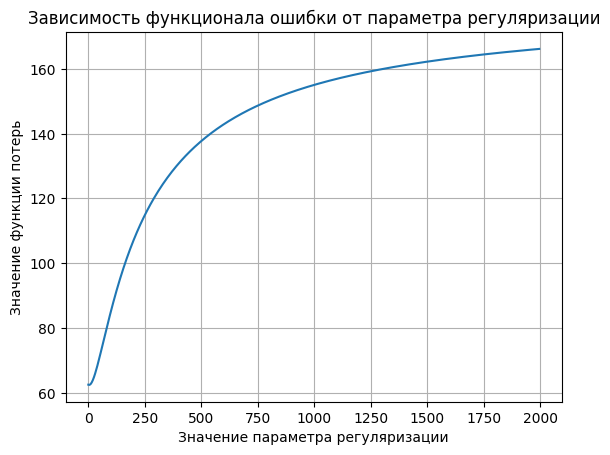

In [10]:
#Подбор оптимальное значение параметра регуляризации
ridge.choose_t(X_val,y_train,y_val,0,2000,5)

В данном случае регуляризация не нужна, однако для изменения параметра можно переобучить веса

In [ ]:
ridge.fit_just_weights(y_train,t=0)

In [11]:
print("R**2 написанной вручную модели с использованием кросс-валидации:", np.round(cross_validation(create_model(RidgeRegressor,fit_intercept=True),X,Y,5, regression=True, fit_params={'t':0}),4))
print("R**2 эталонной реализации модели с использованием кросс-валидации:", np.round(cross_validation(create_model(Ridge, alpha=0),X,Y,5, regression=True),4))

R**2 написанной вручную модели с использованием кросс-валидации: 0.9887
R**2 эталонной реализации модели с использованием кросс-валидации: 0.9887
